In [1]:
#@title Enter Odom Coordinates (0 -> 5) and Yaw (-180 -> 180), then press 'Run all' from 'Runtime' tab. { display-mode: "form" }
x_coordinate = 1 #@param {type:"raw"}
y_coordinate = 3 #@param {type:"raw"}
yaw = -20 #@param {type:"raw"}

#Code

1.0


Text(2.6, 2.6, 'Checkpoint Centroid')

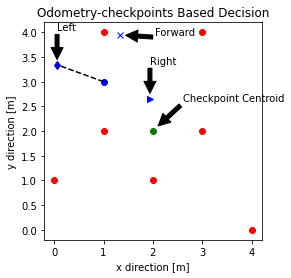

In [6]:
#@title

import numpy as np
from matplotlib import pyplot as plt
import math


#!!!!!!!!!!!!!!!!
#Red is all the checkpoints
#Green is the centroid
#Blue circle is where we are
#Blue X indicates the direction we are facing
#Blue diamond is the left direction
#Blue triangle is the right direction
#Dotted line is the direction algorithm chooses is better
odom_array = np.array([[0,1], [1,2], [3, 2], [2, 1], [4, 0], [1, 4], [3, 4]])

x = odom_array[:, 0]
y = odom_array[:, 1]  

current_x = x_coordinate
current_y = y_coordinate

_len = len(x)
centroid_x = sum(x)/_len
centroid_y = sum(y)/_len

diff = np.array([(current_x-centroid_x), (current_y-centroid_y)])


angle = yaw
angle_rad = angle *math.pi / 180 + (math.pi/2)

left_angle = angle_rad + math.pi/2
right_angle = angle_rad - math.pi/2

unit_vector = np.array([math.cos(angle_rad), math.sin(angle_rad)])

unit_vector_left = np.array([math.cos(left_angle), math.sin(left_angle)])
unit_vector_right = np.array([math.cos(right_angle), math.sin(right_angle)])

result = np.sign(np.dot(unit_vector_left, diff))
print(result)

if (result == 1):
  left = True
else:
  left = False

fig, axs = plt.subplots(1, 1)
plt.title("Odometry-checkpoints Based Decision") 
plt.xlabel("x direction [m]") 
plt.ylabel("y direction [m]") 
plt.plot(x,y, 'ro')
plt.plot(current_x, current_y, 'bo')

plt.plot(current_x+unit_vector[0], current_y+unit_vector[1], 'bx')


plt.plot(centroid_x, centroid_y, 'go')

plt.plot(current_x+unit_vector_left[0], current_y+unit_vector_left[1], 'bd')
plt.plot(current_x+unit_vector_right[0], current_y+unit_vector_right[1], 'b>')

if left:
  plt.plot([current_x, current_x+unit_vector_left[0]], [current_y, current_y+unit_vector_left[1]], 'k--')

else:
  plt.plot([current_x, current_x+unit_vector_right[0]], [current_y, current_y+unit_vector_right[1]], 'k--')

axs.set_aspect('equal', 'box')

axs.annotate('Left', xy=(current_x+unit_vector_left[0], current_y+unit_vector_left[1]+ 0.1), xytext=(current_x+unit_vector_left[0], current_y+unit_vector_left[1]+0.7),
            arrowprops=dict(facecolor='black', shrink=0.01))
axs.annotate('Right', xy=(current_x+unit_vector_right[0], current_y+unit_vector_right[1]+ 0.1), xytext=(current_x+unit_vector_right[0], current_y+unit_vector_right[1]+0.7),
            arrowprops=dict(facecolor='black', shrink=0.01))
axs.annotate('Forward', xy=(current_x+unit_vector[0]+ 0.1, current_y+unit_vector[1]), xytext=(current_x+unit_vector[0] + 0.7, current_y+unit_vector[1]),
            arrowprops=dict(facecolor='black', shrink=0.01))

axs.annotate('Checkpoint Centroid', xy=(centroid_x+ 0.1, centroid_y+ 0.1), xytext=(centroid_x + 0.6, centroid_y + 0.6),
            arrowprops=dict(facecolor='black', shrink=0.01))



Red is all the checkpoints<br>
Green is the centroid<br>
Blue circle is where we are<br>
Blue X indicates the direction we are facing<br>
Blue diamond is the left direction<br>
Blue triangle is the right direction<br>
Dotted line is the direction algorithm chooses is better<br>